# Analysis of Price Action predictability with Fibonacci retracements

In [42]:
## Load required libraries:

import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
def peak_detect(series,n=5,order=10):
    
    # This function finds the latest n inflexion points
    # in the series provided.
    
    # Find out relative local extrema:
    max_ind = list(argrelextrema(series,np.greater,order=order)[0])
    min_ind = list(argrelextrema(series,np.less,order=order)[0])

    idx = max_ind + min_ind + [len(series)-1]

    idx.sort()

    current_idx = idx[-n:] # Take the last n peaks
    
    start = min(current_idx)
    end = max(current_idx)
    
    current_pat = series[current_idx]
    
    return current_idx,current_pat,start,end

In [45]:
def is_fib_retracement(moves,err_allowed=0.05,level=0.618):
    
    # This function takes the distances from different peaks (i.e. moves)
    # and determines if the current value of the series is at a retracement
    # level (default: 0.618 or 61.8%)
    
    XA = moves[0]
    AB = moves[1]
    
    if (XA > 0 and AB < 0 ) or (XA < 0 and AB > 0 ):
    
        AB_range = np.array([level - err_allowed,level + err_allowed])*abs(XA)
        if AB_range[0] < abs(AB) < AB_range[1]:
            return 1
        else:
            return np.NAN
    else:
        return np.NAN

### Simple Example of the functions

In [161]:
# import sample data:
data = pd.read_csv('..\Historical Data\EURUSD240.csv',sep=',')

In [162]:
# Set the data to time series and get price series i.e. Closing price
data.Time = pd.to_datetime(data.Time,format = "%Y/%m/%d %H:%M")
data = data.set_index(data.Time)
data = data[['Close']]

series = data.Close

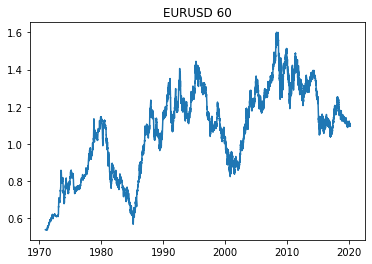

In [163]:
# Plot price series:
plt.plot(series)
plt.title('EURUSD 60')
plt.show()

In [164]:
## Lets take the last 240 hours (which is rougly two weeks)
sample = series[-240:]
sample.head()

Time
2019-12-12 20:00:00    1.11832
2019-12-13 00:00:00    1.11737
2019-12-13 04:00:00    1.11668
2019-12-13 08:00:00    1.11794
2019-12-13 12:00:00    1.11524
Name: Close, dtype: float64

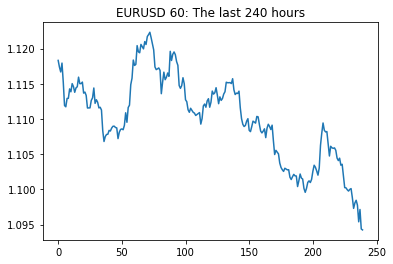

In [166]:
# Plot the sample:
plt.plot(sample.values)
plt.title('EURUSD 60: The last 240 hours')
plt.show()

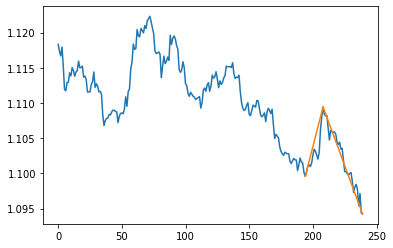

In [167]:
# Detect the peaks and plot sample series with peaks:

current_idx,current_pat,start,end = peak_detect(sample.values,n=3,order=10)

plt.plot(sample.values)
plt.plot(current_idx,current_pat)
plt.show()

In [168]:
# create moves and determine if they are a fibonacci retracement of a certain level: 

XA = current_pat[1] - current_pat[0]
AB = current_pat[2] - current_pat[1]

moves = [XA,AB]

is_fib_retracement(moves,err_allowed=0.05,level=0.618)

# Fib retracement yes/no.

nan

In [ ]:
#df_retracements = pd.DataFrame(columns=('Index','Time','Retracement','Holding Period','PnL'))

In [169]:
# Loop Through time series and find Fib retracments:

df_retracements = pd.DataFrame(columns=('Index','Time','Retracement',
                                        'PnL_5','PnL_6','PnL_7','PnL_8','PnL_9','PnL_10',
                                        'PnL_11','PnL_12','PnL_13','PnL_14','PnL_15'))

h = 6 

for i in range(100,len(series)):
    # Detect points:
    current_idx,current_pat,start,end = peak_detect(series.values[:i],n=3,order=10)
    
    # Create moves:
    XA = current_pat[1] - current_pat[0]
    AB = current_pat[2] - current_pat[1]

    moves = [XA,AB]
    
    # Check for retracement:
    res = is_fib_retracement(moves,err_allowed=0.05,level=0.5)
    
    if res == 1:
        
        # Calculate PnL
        if AB > 0:
            pnl_5 = -(series.values[i+5] - series.values[i])
            pnl_6 = -(series.values[i+6] - series.values[i])
            pnl_7 = -(series.values[i+7] - series.values[i])
            pnl_8 = -(series.values[i+8] - series.values[i])
            pnl_9 = -(series.values[i+9] - series.values[i])
            pnl_10 = -(series.values[i+10] - series.values[i])
            pnl_11 = -(series.values[i+11] - series.values[i])
            pnl_12 = -(series.values[i+12] - series.values[i])
            pnl_13 = -(series.values[i+13] - series.values[i])
            pnl_14 = -(series.values[i+14] - series.values[i])
            pnl_15 = -(series.values[i+15] - series.values[i])
        else:
            pnl_5 = (series.values[i+5] - series.values[i])
            pnl_6 = (series.values[i+6] - series.values[i])
            pnl_7 = (series.values[i+7] - series.values[i])
            pnl_8 = (series.values[i+8] - series.values[i])
            pnl_9 = (series.values[i+9] - series.values[i])
            pnl_10 = (series.values[i+10] - series.values[i])
            pnl_11 = (series.values[i+11] - series.values[i])
            pnl_12 = (series.values[i+12] - series.values[i])
            pnl_13 = (series.values[i+13] - series.values[i])
            pnl_14 = (series.values[i+14] - series.values[i])
            pnl_15 = (series.values[i+15] - series.values[i])

        df_retracements = df_retracements.append({"Index":i,"Time":str(series.index[i]),"Retracement":abs(AB/XA),
                                                 "PnL_5":pnl_5,"PnL_6":pnl_6,"PnL_7":pnl_7,"PnL_8":pnl_8,"PnL_9":pnl_9,
                                                 "PnL_10":pnl_10,"PnL_11":pnl_11,"PnL_12":pnl_12,"PnL_13":pnl_13,"PnL_14":pnl_14,
                                                 "PnL_15":pnl_15,},ignore_index=True)
        

In [170]:
df_retracements.head()

,Index,Time,Retracement,PnL_5,PnL_6,PnL_7,PnL_8,PnL_9,PnL_10,PnL_11,PnL_12,PnL_13,PnL_14,PnL_15
0,104,1971-06-01 20:00:00,0.493151,0.0062,0.0064,0.0068,0.0068,0.0068,0.0069,0.0073,0.0070,0.0071,0.0074,0.0089
1,209,1971-11-09 20:00:00,0.484848,0.0020,0.0008,0.0024,0.0033,0.0045,0.0067,0.0071,0.0067,0.0063,0.0080,0.0105
2,210,1971-11-10 20:00:00,0.500000,0.0001,0.0017,0.0026,0.0038,0.0060,0.0064,0.0060,0.0056,0.0073,0.0098,0.0133
3,218,1971-11-22 20:00:00,0.500000,-0.0035,-0.0060,-0.0095,-0.0130,-0.0100,-0.0107,-0.0093,-0.0081,-0.0085,-0.0120,-0.0091
4,278,1972-03-06 20:00:00,0.493151,-0.0007,-0.0014,-0.0006,0.0206,0.0008,0.0001,0.0002,0.0013,0.0025,0.0006,0.0006


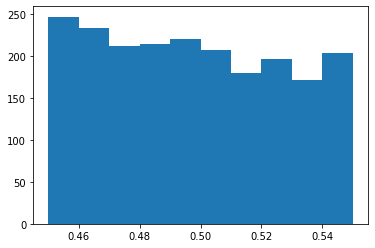

In [171]:
plt.hist(df_retracements['Retracement'])
plt.show()

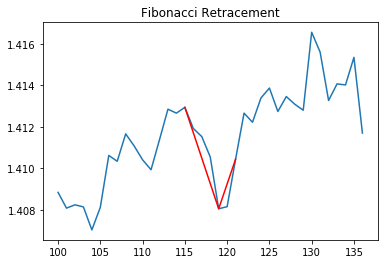

In [150]:
# Print an example retracement:

i = 122
# Detect points:
current_idx,current_pat,start,end = peak_detect(series.values[:i],n=3,order=10)
    
# Create moves:
XA = current_pat[1] - current_pat[0]
AB = current_pat[2] - current_pat[1]
moves = [XA,AB]

# plot:
plt.plot(np.arange(start-15,i+15),series.values[start-15:i+15])
plt.plot(current_idx,current_pat,c="r")
plt.title('Fibonacci Retracement')
plt.show()


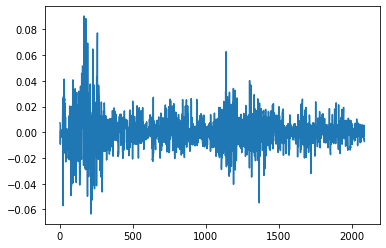

In [172]:
plt.plot(df_retracements['PnL_11'])
plt.show()

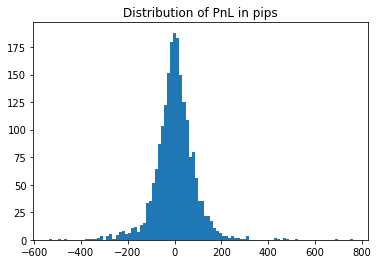

In [173]:
plt.hist(df_retracements['PnL_5']*10000,bins=100)
plt.title('Distribution of PnL in pips')
plt.show()